In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium  ### map 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
path = 'https://raw.githubusercontent.com/umangkejriwal1122/Machine-Learning/master/Data%20Sets/covid_india.csv'

In [3]:
df = pd.read_csv(path)
df.head()

,Unnamed: 0,States,Confirmed,Cured,Death,Active,Lat,Long
0,0,Andaman and Nicobar Islands,33,33,0,0,11.7401,92.6586
1,1,Andhra Pradesh,4510,2620,73,1817,15.9129,79.7400
2,2,Arunachal Pradesh,47,1,0,46,28.2180,94.7278
3,3,Assam,2397,547,4,1846,26.2006,92.9376
4,4,Bihar,4915,2425,30,2460,25.0961,85.3131


In [4]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.head()

,States,Confirmed,Cured,Death,Active,Lat,Long
0,Andaman and Nicobar Islands,33,33,0,0,11.7401,92.6586
1,Andhra Pradesh,4510,2620,73,1817,15.9129,79.7400
2,Arunachal Pradesh,47,1,0,46,28.2180,94.7278
3,Assam,2397,547,4,1846,26.2006,92.9376
4,Bihar,4915,2425,30,2460,25.0961,85.3131


In [6]:
total_active_cases = df.groupby('States')['Active'].sum()
total_active_cases = total_active_cases.sort_values(ascending=False).to_frame()
total_active_cases

,Active
States,
Maharashtra,42609
Delhi,16229
Tamil Nadu,13506
Gujarat,5057
West Bengal,4236
Uttar Pradesh,3828
Karnataka,3186
Madhya Pradesh,2721
Rajasthan,2599


In [7]:
total_active_cases.style.background_gradient(cmap='Reds')

,Active
States,
Maharashtra,42609
Delhi,16229
Tamil Nadu,13506
Gujarat,5057
West Bengal,4236
Uttar Pradesh,3828
Karnataka,3186
Madhya Pradesh,2721
Rajasthan,2599


In [9]:
#### Plot Total Confirmed Cases Vs Total Recovered Cases
data = df[['States','Confirmed','Cured']]
data = data.sort_values('Confirmed',ascending=False)
data.head()

,States,Confirmed,Cured
19,Maharashtra,82968,37390
29,Tamil Nadu,30152,16395
8,Delhi,27654,10664
10,Gujarat,19592,13316
27,Rajasthan,10331,7501


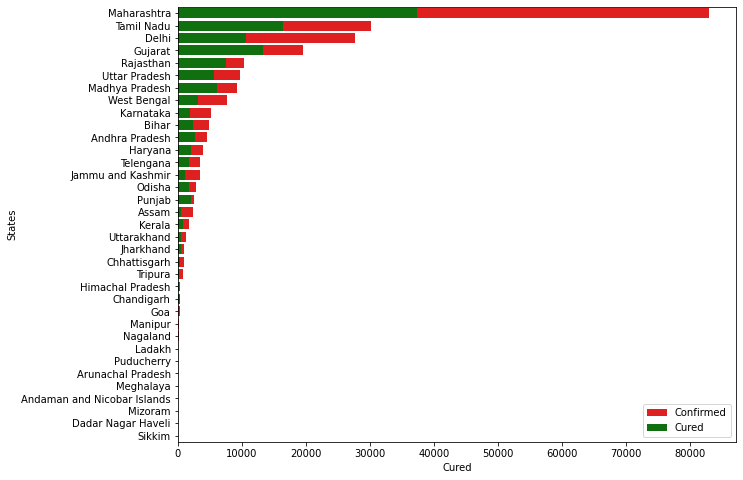

In [11]:
plt.figure(figsize=(10,8))
sns.barplot(data["Confirmed"],data['States'],color='Red',label="Confirmed")
sns.barplot(data["Cured"],data['States'],color='Green',label="Cured")
plt.legend(loc=4)
plt.show()

In [14]:
#### Plot Total Confirmed Cases Vs Total Death Cases
death_data = df[['States','Confirmed','Death']]
death_data = death_data.sort_values('Confirmed',ascending=False)
death_data.head()

,States,Confirmed,Death
19,Maharashtra,82968,2969
29,Tamil Nadu,30152,251
8,Delhi,27654,761
10,Gujarat,19592,1219
27,Rajasthan,10331,231


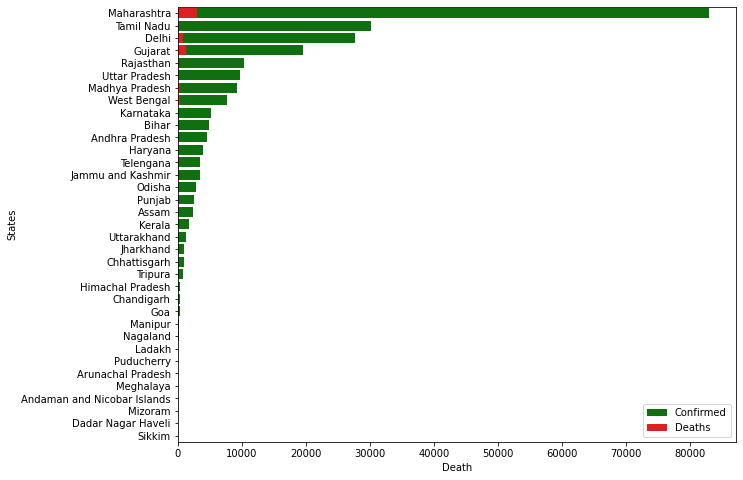

In [15]:
plt.figure(figsize=(10,8))
sns.barplot(death_data["Confirmed"],death_data['States'],color='green',label="Confirmed")
sns.barplot(death_data["Death"],death_data['States'],color='red',label="Deaths")
plt.legend(loc=4)
plt.show()

In [19]:
df.head()

,States,Confirmed,Cured,Death,Active,Lat,Long
0,Andaman and Nicobar Islands,33,33,0,0,11.7401,92.6586
1,Andhra Pradesh,4510,2620,73,1817,15.9129,79.7400
2,Arunachal Pradesh,47,1,0,46,28.2180,94.7278
3,Assam,2397,547,4,1846,26.2006,92.9376
4,Bihar,4915,2425,30,2460,25.0961,85.3131


In [0]:
india_map = folium.Map(location=[9,80],zoom_start=4,max_zoom=5,
                       height=1000,width='100%')

In [0]:
for i in range(0,len(df[df['Active']>0].index)):
  folium.Circle(location=[df.iloc[i]['Lat'],df.iloc[i]['Long']],
                radius = (int(np.log2(df.iloc[i]['Active']+0.001)))*15000,
                tooltip=str(df.iloc[i]["Active"])).add_to(india_map)

In [18]:
india_map